In [1]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt 
import joblib
import warnings
import datetime as datetime
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\visha\Downloads\Flight_Price_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Question 1: Perform Feature Engineering


a) Perform basic exploration like checking for top 5 records,
shape, statistical info, duplicates, Null values etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape

(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.duplicated().sum()

220

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

b) Extract Date, Month, Year from Date of Journey column

In [8]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_year'] = df['Date_of_Journey'].dt.year
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


# Question 2: Perform Exploratory Data Analysis (EDA) tasks

a) Which airline is most preferred airline

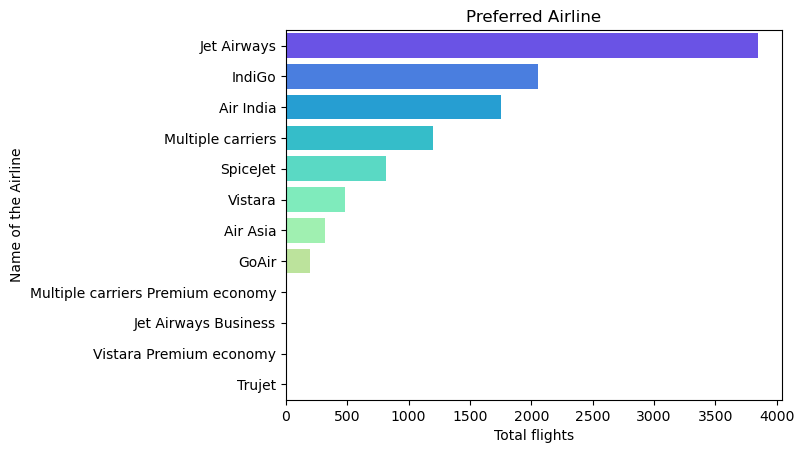

<Figure size 1500x800 with 0 Axes>

In [9]:
import seaborn as sns
sns.barplot( x= df['Airline'].value_counts().values,
           y = df['Airline'].value_counts().index,
           palette ='rainbow')
plt.xlabel('Total flights')
plt.ylabel('Name of the Airline')
plt.title('Preferred Airline')
plt.figure(figsize=(15,8))
plt.show()

From the above figure we can say that Jet Airways is the most preferred airline. 

c) Find the majority of the flights take off from which source

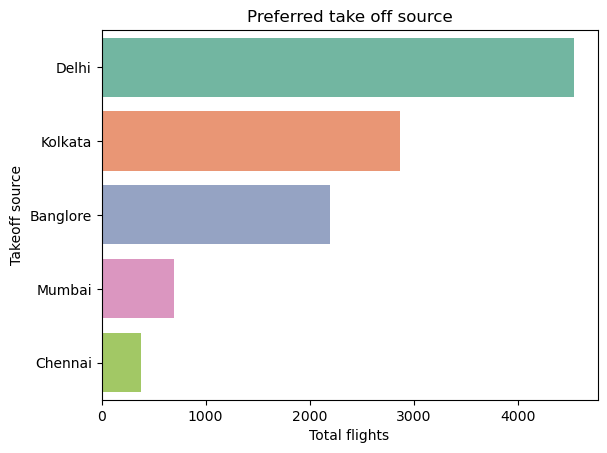

<Figure size 500x1800 with 0 Axes>

In [10]:
sns.barplot( x= df['Source'].value_counts().values,
           y = df['Source'].value_counts().index,
           palette ='Set2')
plt.xlabel('Total flights')
plt.ylabel('Takeoff source')
plt.title('Preferred take off source')
plt.figure(figsize=(5,18))
plt.show()

Here we can see that majority of the flights takeoff from Delhi.

d) Find maximum flights land in which destination

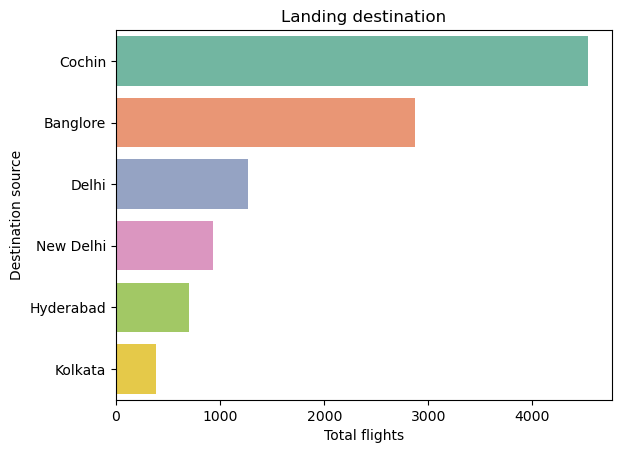

<Figure size 500x1800 with 0 Axes>

In [11]:
sns.barplot( x= df['Destination'].value_counts().values,
           y = df['Destination'].value_counts().index,
           palette ='Set2')
plt.xlabel('Total flights')
plt.ylabel('Destination source')
plt.title('Landing destination')
plt.figure(figsize=(5,18))
plt.show()

Cochin is the destination where maximum flights land.

# Q3: Compare independent features with Target feature to check the impact on price


a) Which airline has the highest price

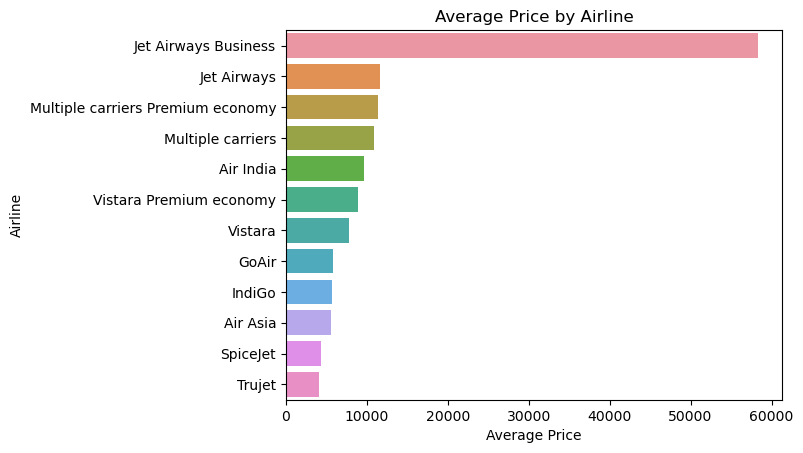

<Figure size 1000x600 with 0 Axes>

In [12]:
Average_price = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=Average_price.values, 
            y=Average_price.index)
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.title('Average Price by Airline')
plt.figure(figsize=(10, 6))
plt.show()

From the above table we can say the Jet Airways business has the highest price. 

# Q4: Perform encoding for the required features according to the data

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
df.drop('Date_of_Journey', axis=1, inplace=True)
df.drop('Route', axis=1, inplace=True)
df.drop('Arrival_Time', axis=1, inplace=True)
df.drop('Duration', axis=1, inplace=True)
df.drop('Dep_Time', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Journey_Date     10683 non-null  int32 
 7   Journey_Month    10683 non-null  int32 
 8   Journey_year     10683 non-null  int32 
dtypes: int32(3), int64(1), object(5)
memory usage: 626.1+ KB


In [16]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Date       0
Journey_Month      0
Journey_year       0
dtype: int64

In [17]:
for i in ['Total_Stops']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Date       0
Journey_Month      0
Journey_year       0
dtype: int64

<Axes: >

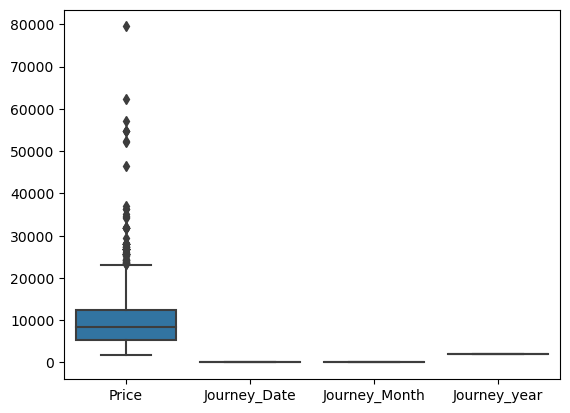

In [19]:
sns.boxplot(data=df)

In [20]:
for i in df:               
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1 
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

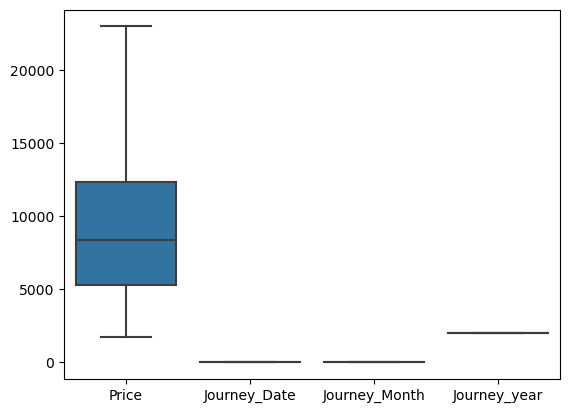

In [21]:
sns.boxplot(data=df)

In [22]:
df_NumVar = df.select_dtypes(include=[np.number])
df_NumVar.head()

,Price,Journey_Date,Journey_Month,Journey_year
0,3897,24,3,2019
1,7662,1,5,2019
2,13882,9,6,2019
3,6218,12,5,2019
4,13302,1,3,2019


In [23]:
df_CatVar = df.select_dtypes(include=['object'])
df_CatVar.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

columns_to_encode = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']


pipeline = Pipeline([
    ('label_encoding', LabelEncoder())
])


for col in columns_to_encode:
    df[col] = pipeline.named_steps['label_encoding'].fit_transform(df[col])

In [25]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_year
0,3,0,5,4,8,3897,24,3,2019
1,1,3,0,1,8,7662,1,5,2019
2,4,2,1,1,8,13882,9,6,2019
3,3,3,0,0,8,6218,12,5,2019
4,3,0,5,0,8,13302,1,3,2019


# Q5: Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model.



In [26]:
from sklearn.model_selection import train_test_split as tts
x = df.drop(['Price'],axis =1)
y = df[['Price']]
x_train,x_test,y_train,y_test = tts(x,y, train_size = 0.70, random_state = 2525)

In [27]:
train = pd.concat([x_train,y_train], axis =1)
test = pd.concat([x_test,y_test], axis =1)

Linear Regression:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train, y_train)

y_pred_linear_reg = linear_reg_model.predict(x_test)

mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("Mean Squared Error:", mse_linear_reg)
print("R^2 Score:", r2_linear_reg)


Mean Squared Error: 10679274.267735554
R^2 Score: 0.41933604719566575


Decision Tree:

In [29]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(x_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(x_test)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("\nDecision Tree Model Performance:")
print("Mean Squared Error:", mse_decision_tree)
print("R^2 Score:", r2_decision_tree)


Decision Tree Model Performance:
Mean Squared Error: 2573001.604320839
R^2 Score: 0.8600982384495279


Random Forest: 

In [30]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(x_train, y_train)

y_pred_random_forest = random_forest_model.predict(x_test)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("\nRandom Forest Model Performance:")
print("Mean Squared Error:", mse_random_forest)
print("R^2 Score:", r2_random_forest)


Random Forest Model Performance:
Mean Squared Error: 2459172.6243075025
R^2 Score: 0.8662874591607068


# Q6. Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement.



In [31]:
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_linear_reg, mse_decision_tree , mse_random_forest ],
    'R²': [r2_linear_reg, r2_decision_tree , r2_random_forest ]
})

print("Model Performance:")
print(model_performance)

Model Performance:
               Model           MSE        R²
0  Linear Regression  1.067927e+07  0.419336
1      Decision Tree  2.573002e+06  0.860098
2      Random Forest  2.459173e+06  0.866287


From the above comparision of the models taken, we can say that Random Forest has the highest R2 value. Hence we can say that the model is good fit and use it for our business purpose. We can hands up use Random Forest as the model for our business because not only it has given us the highest accuracy for our analysis but also it uses n number of decisions and finds the optimal desicion by taking the average of all the tree, which is very efficient in predicting our outcome.

In [32]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
param_grid_lr = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

In [34]:
grid_lasso = GridSearchCV(Lasso(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_scaled, y_train)
grid_ridge = GridSearchCV(Ridge(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [35]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
}

grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [36]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

With 86% accuracy of the data and given the robust functionality of the Random forest algorithm we can use this model to tune our flight prices according to the customers demand. From the data we can see that flights from Metropolitan cities have the highest takeoffs, hence providing inflight facilities and improving customer friendly service could foster more revenue from these cities. 

# Q7: Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline.



In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [38]:
df_test = pd.read_excel(r"C:\Users\visha\Downloads\Flight_Price_Test.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [40]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y')
df_test['Journey_date'] = df_test['Date_of_Journey'].dt.day
df_test['Journey_month'] = df_test['Date_of_Journey'].dt.month
df_test['Journey_year'] = df_test['Date_of_Journey'].dt.year
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Journey_year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [41]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Journey_year
0,4,32,2,1,76,138,150,10,0,5,2,3,0
1,3,24,3,0,65,31,353,248,0,5,4,2,0
2,4,27,2,1,76,156,566,148,0,3,7,2,0
3,6,27,2,1,76,48,633,36,0,5,7,2,0
4,0,38,0,2,16,198,135,216,4,5,8,3,0


In [42]:
cat_var = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']
num_var = ['Journey_date', 'Journey_month', 'Journey_year']

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_var),
        ('cat', OneHotEncoder(handle_unknown='ignore',
                              sparse_output=False), cat_var)])

In [44]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [50]:
pipeline.fit(df_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Journey_date',
                                                   'Journey_month',
                                                   'Journey_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Airline', 'Source',
                                                   'Destination', 'Total_Stops',
                                                   'Additional_Info'])]))])

In [51]:
X_test_transformed = pipeline.transform(df_test)
X_test_transformed

array([[-0.80998887,  1.09474457,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.09667523,  0.2405048 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.97329523,  0.2405048 ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.80998887, -1.46797475,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.80998887, -1.46797475,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.25998159,  1.09474457,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

# Q8. Calculate the a) recency (R), b) frequency (F) c) monetary value (M) for each customer based on the given dataset?





In [54]:
RFM_df = pd.read_csv(r"C:\Users\visha\Downloads\RFM data.csv")
RFM_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [55]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [57]:
RFM_df['InvoiceDate'] = pd.to_datetime(RFM_df['InvoiceDate'])

In [58]:
RFM_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [59]:
from datetime import timedelta
snapshot_date = RFM_df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [60]:
data_process = RFM_df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice': 'sum'})

In [61]:
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalPrice': 'MonetaryValue'}, inplace=True)

data_process

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,19,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


# Q9: a) Calculate RFM scores. Each customer will get a note between 1 and 5 for each parameter for Recency(R), Frequency(F) and Monetary value(M)



In [62]:
def categorize_days(days):
    if days <= 30:
        return 5
    elif days <= 60:
        return 4
    elif days <= 90:
        return 3
    elif days <= 180:
        return 2
    elif days <= 365:
        return 1
    else:
        return 1

In [63]:
data_process['Recency_Rank']=data_process['Recency'].apply(categorize_days)

In [64]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4298 entries, 12347.0 to 18287.0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4298 non-null   int64  
 1   Frequency      4298 non-null   int64  
 2   MonetaryValue  4298 non-null   float64
 3   Recency_Rank   4298 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 167.9 KB


In [65]:
data_process['Recency_Rank'] = data_process['Recency_Rank'].astype(int)

In [66]:
data_process['Recency_Rank'] = data_process['Recency_Rank'].astype('category')

In [67]:
data_process.head()

,Recency,Frequency,MonetaryValue,Recency_Rank
CustomerID,,,,
12347.0,2,181,4060.40,5
12348.0,75,27,1437.24,3
12349.0,19,71,1417.60,5
12350.0,310,16,294.40,1
12352.0,36,77,1385.74,4


In [68]:
f_labels = range(1, 6)      

m_labels = range(1, 6)  

f_groups = pd.qcut(data_process['Frequency'], q=5, labels=f_labels)
m_groups = pd.qcut(data_process['MonetaryValue'], q=5, labels=m_labels)

data_process = data_process.assign(Frequency_Rank = f_groups.values, Moentary_Rank = m_groups.values)

In [69]:
data_process.head()

,Recency,Frequency,MonetaryValue,Recency_Rank,Frequency_Rank,Moentary_Rank
CustomerID,,,,,,
12347.0,2,181,4060.40,5,5,5
12348.0,75,27,1437.24,3,2,4
12349.0,19,71,1417.60,5,4,4
12350.0,310,16,294.40,1,2,2
12352.0,36,77,1385.74,4,4,4


In [70]:
data_process['RFM_Segment_Concat'] = data_process.Recency_Rank.astype(str) + data_process.Frequency_Rank.astype(str) + data_process.Moentary_Rank.astype(str)
rfm1 = data_process
rfm1.head()

,Recency,Frequency,MonetaryValue,Recency_Rank,Frequency_Rank,Moentary_Rank,RFM_Segment_Concat
CustomerID,,,,,,,
12347.0,2,181,4060.40,5,5,5,555
12348.0,75,27,1437.24,3,2,4,324
12349.0,19,71,1417.60,5,4,4,544
12350.0,310,16,294.40,1,2,2,122
12352.0,36,77,1385.74,4,4,4,444


b) Segment the customers based on their RFM scores using the
dataset?

In [71]:
def assign_segment(row):
    recency = row['Recency_Rank']
    frequency = row['Frequency_Rank']
    monetary = row['Moentary_Rank']
    
    if 4 <= recency <= 5:
        if 4 <= frequency <= 5:
            if 4 <= monetary <= 5:
                return 'Champions'
            else:
                return 'Loyal customers'
        elif 2 <= frequency <= 3 and 2 <= monetary <= 3:
            return 'Potential loyalist'
        elif 1 <= frequency <= 2 and 1 <= monetary <= 2:
            return 'Recent customers'
        else:
            return 'Promising'
    elif 3 <= recency <= 5 and 3 <= frequency <= 5 and 3 <= monetary <= 5:
        return 'Needs attention'
    elif 1 <= recency <= 2 and 1 <= frequency <= 2 and 1 <= monetary <= 2:
        return 'About to sleep'
    elif 2 <= recency <= 5 and 1 <= frequency <= 3 and 1 <= monetary <= 3:
        return 'At risk'
    elif 1 <= recency <= 3 and 4 <= frequency <= 5 and 4 <= monetary <= 5:
        return 'Can\'t lose them'
    elif 1 <= recency <= 2 and 1 <= frequency <= 2 and 1 <= monetary <= 2:
        return 'Hibernating'
    else:
        return 'Other'  

In [72]:
rfm1['Segment'] = rfm1.apply(assign_segment, axis=1)

In [73]:
rfm1.head()

,Recency,Frequency,MonetaryValue,Recency_Rank,Frequency_Rank,Moentary_Rank,RFM_Segment_Concat,Segment
CustomerID,,,,,,,,
12347.0,2,181,4060.40,5,5,5,555,Champions
12348.0,75,27,1437.24,3,2,4,324,Other
12349.0,19,71,1417.60,5,4,4,544,Champions
12350.0,310,16,294.40,1,2,2,122,About to sleep
12352.0,36,77,1385.74,4,4,4,444,Champions


In [74]:
rfm1.Segment.value_counts()

Segment
Champions             1117
About to sleep         789
Potential loyalist     491
Other                  396
At risk                376
Recent customers       280
Promising              266
Needs attention        229
Loyal customers        223
Can't lose them        131
Name: count, dtype: int64

# Q10: a) Visualize the RFM segments.

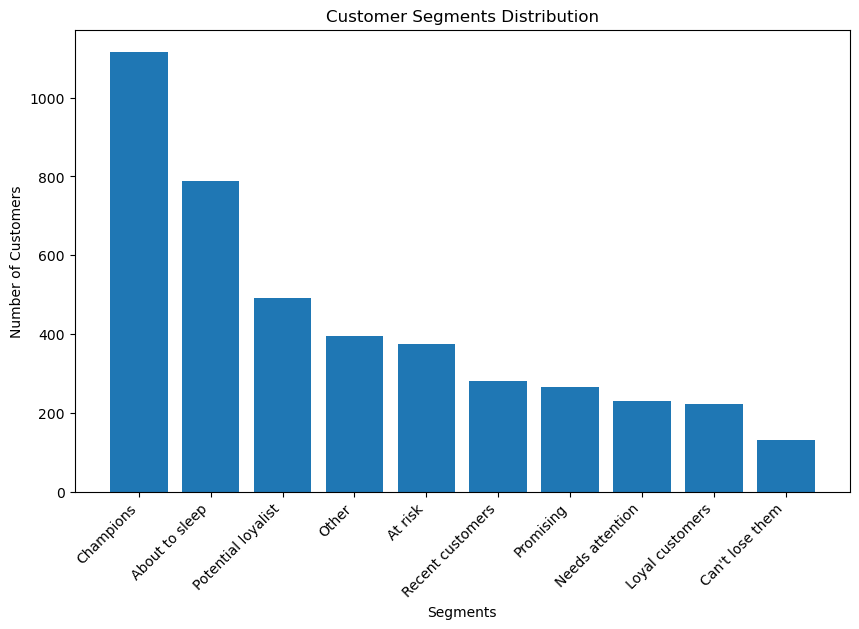

In [77]:
import matplotlib.pyplot as plt

segments = {
    "Champions": 1117,
    "About to sleep": 789,
    "Potential loyalist": 491,
    "Other": 396,
    "At risk": 376,
    "Recent customers": 280,
    "Promising": 266,
    "Needs attention": 229,
    "Loyal customers": 223,
    "Can't lose them": 131
}


segment_names = list(segments.keys())
segment_counts = list(segments.values())


plt.figure(figsize=(10, 6))
plt.bar(segment_names, segment_counts)
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.title('Customer Segments Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()


b) Conclude your findings of RFM analysis and suggest some
strategies on it.

Findings:

1) With the insights found from RFM model we can say that a good number of customers are champion customers who buy our products often, spent most on our products and bought some of the other product most recently. We can safely say that these customers contibute to majority of our profits and we need to keep updating our products to sustain these champion customers for a long period of time. 

2) On the other hand we have customers in 'About to sleep' and 'Potential loyalist' segment with average and below average frequncy levels. Where customers spend their money at times. In order for these categoried to move up the ranks, we can target the buying patterns of these customers and give customer specific discounts. 

3) There are good number of customers who are at risk, who used to purchase frequently and haven't returned after a long time. To pull these category of customers to loyal customers or champion customers we may try asking them for feedback if they have found a better platform and what are the services we lack to them. Eg: If the customer says that they are not returning because of the customer serivce provided at that time, say them that we have imporved our customer service now, and all the help which is needed is at their fingertips and and they can get help with very less waiting time. 

4) One category we need to be very aware of is the loyal customers. Figures of this category could be concerning but we can try and convert these type of customers by following up on their purchases asking what could we have done better if there was any. Frequently following up builds trust and could make these customers into champion customers.